# Análise Exploratória de Dados de Telecomunicações

O objetivo deste projeto é realizar a **exploração e o tratamento de dados** de uma base de clientes de uma empresa de telecomunicações, com foco na preparação dos dados para modelagem preditiva de churn (como classificação).

O projeto está dividido em dois arquivos, sendo este o segundo, que aborda:

**Análise Exploratória de Dados**:  
- Análise univariada das variáveis  
- Análise bivariada para identificar relações entre os dados  

Este trabalho visa a extração de insights que podem apoiar a tomada de decisão e orientar etapas futuras do projeto.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/churn_telecom_tratado.csv')

df.head()

,Gender,IsSenior,Married,Dependents,ClientMonths,PhoneService,InternetService,OnlineSecurity,TechSupport,StreamingTV,ContractType,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,female,0,yes,no,1,no,dsl,no,no,no,month-to-month,electronic check,29.85,29.85,no
1,male,0,no,no,34,yes,dsl,yes,no,no,one year,mailed check,56.95,1889.50,no
2,male,0,no,no,2,yes,dsl,yes,no,no,month-to-month,mailed check,53.85,108.15,yes
3,male,0,no,no,45,no,dsl,yes,yes,no,one year,bank transfer (automatic),71.45,1840.75,no
4,female,0,no,no,52,yes,no,no internet service,no internet service,no internet service,one year,mailed check,71.45,1022.95,no


## Dicionário de Dados

| Nome da Coluna         | Descrição                                                                 |
|------------------------|---------------------------------------------------------------------------|
| **Gender**             | Gênero do cliente.                                                        |
| **IsSenior**              | Indica se o cliente tem 60 anos ou mais. (Sim = 1, Não = 0)              |
| **Married**             | Indica se o cliente é casado.                                             |
| **Dependents**         | Indica se o cliente possui dependentes.                                   |
| **ClientMonths** | Tempo (em meses) que o cliente está na empresa.                           |
| **PhoneService**       | Indica se o cliente contratou serviço telefônico.                         |
| **InternetService**   | Tipo de serviço de internet contratado.                                   |
| **OnlineSecurity**  | Indica se o cliente contratou serviço de segurança.                       |
| **TechSupport**    | Indica se o cliente já acionou o suporte técnico.                         |
| **StreamingTV**        | Indica se o cliente contratou serviço de streaming para TV.               |
| **ContractType**      | Tipo de contrato (mensal, anual etc.).                                    |
| **PaymentMethod**      | Forma de pagamento utilizada pelo cliente.                                |
| **MonthlyCharges**   | Valor pago mensalmente pelo cliente.                                      |
| **TotalCharges**         | Valor total já pago pelo cliente à empresa.                               |
| **Churn**              | Indica se o cliente abandonou a empresa.                                  |



In [3]:
# Confere tipo e dados não nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2488 entries, 0 to 2487
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2488 non-null   object 
 1   IsSenior         2488 non-null   int64  
 2   Married          2488 non-null   object 
 3   Dependents       2488 non-null   object 
 4   ClientMonths     2488 non-null   int64  
 5   PhoneService     2488 non-null   object 
 6   InternetService  2488 non-null   object 
 7   OnlineSecurity   2488 non-null   object 
 8   TechSupport      2488 non-null   object 
 9   StreamingTV      2488 non-null   object 
 10  ContractType     2488 non-null   object 
 11  PaymentMethod    2488 non-null   object 
 12  MonthlyCharges   2488 non-null   float64
 13  TotalCharges     2488 non-null   float64
 14  Churn            2488 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 291.7+ KB


## Análise Univariada

#### Variáveis numéricas

In [4]:
# Estatística descritiva
df.describe()

,IsSenior,ClientMonths,MonthlyCharges,TotalCharges
count,2488.000000,2488.000000,2488.000000,2488.000000
mean,0.161576,32.352090,66.342564,2290.087178
std,0.368135,24.636885,28.051718,2264.585643
min,0.000000,0.000000,18.400000,18.800000
25%,0.000000,8.000000,45.400000,402.337500
50%,0.000000,29.000000,71.450000,1402.900000
75%,0.000000,56.000000,87.712500,3867.162500
max,1.000000,72.000000,118.650000,8564.750000


Neste momento, não vamos analisar a coluna **IsSenior**, pois é uma variável booleana.

Na coluna **TotalCharges**, observamos que a média está distante da mediana e o desvio padrão é elevado, o que pode indicar a presença de valores extremos.

As demais colunas parecem apresentar uma distribuição uniforme, mas vamos analisar cada uma individualmente.

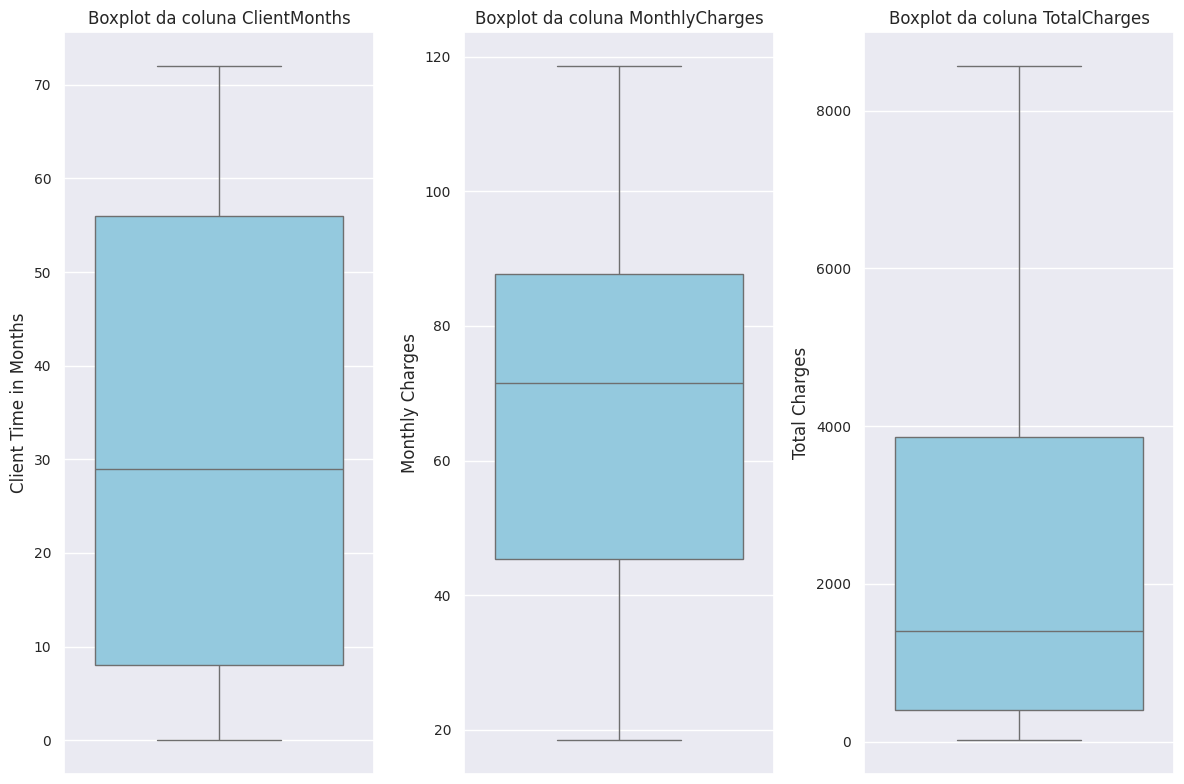

In [5]:
# Boxplot das variáveis numéricas
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")

# ClientMonths
plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='ClientMonths', color='skyblue')
plt.title('Boxplot da coluna ClientMonths')
plt.yticks(fontsize=10)
plt.ylabel('Client Time in Months')

# MonthlyCharges
plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='MonthlyCharges', color='skyblue')
plt.title('Boxplot da coluna MonthlyCharges')
plt.yticks(fontsize=10)
plt.ylabel('Monthly Charges')

# TotalCharges
plt.subplot(1, 3, 3)
sns.boxplot(data=df, y='TotalCharges', color='skyblue')
plt.title('Boxplot da coluna TotalCharges')
plt.yticks(fontsize=10)
plt.ylabel('Total Charges')

plt.tight_layout()
plt.show()


A análise de outliers não identificou pontos fora do intervalo esperado, mas a variável **TotalCharges** apresenta muitos valores baixos.

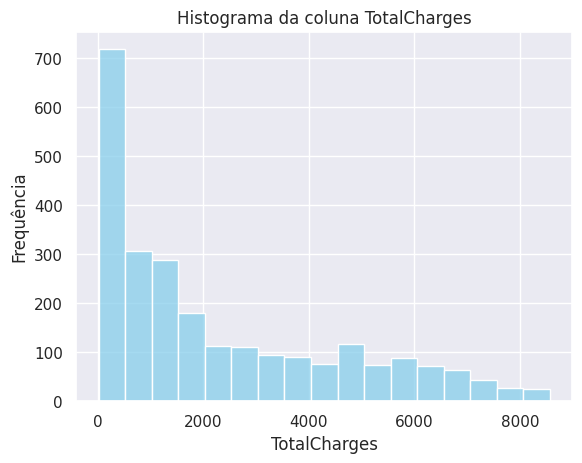

In [6]:
# Histograma de TotalCharges

sns.histplot(data=df, x='TotalCharges', color='skyblue')
plt.title('Histograma da coluna TotalCharges')
plt.ylabel('Frequência')
plt.show()

In [7]:
# Porcentagem de valores abaixo de 400 em TotalCharges
valores_baixos = df[df['TotalCharges'] < 400].value_counts().sum()
(valores_baixos / len(df)) * 100

np.float64(24.919614147909968)

Podemos notar uma alta concentração de valores baixos em **TotalCharges**: quase 25% das entradas estão abaixo de 400.00, enquanto o valor máximo atinge 8500.00.

Por enquanto, optamos por **não alterar essa variável**, pois a distribuição dos valores mais altos pode conter informações importantes para uma futura modelagem preditiva.

#### Variáveis categóricas e booleanas

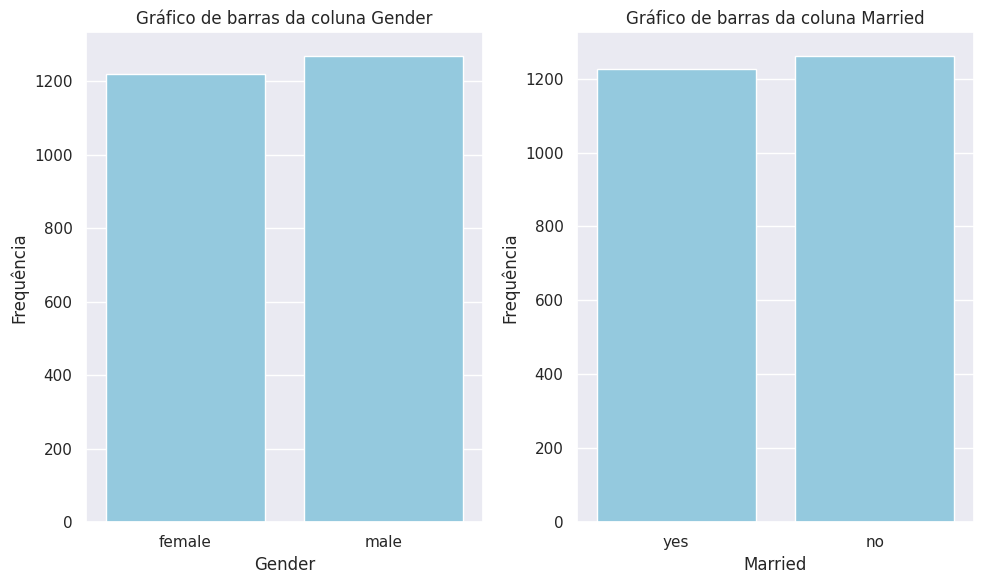

In [8]:
plt.figure(figsize=(10, 6))

# Gráfico de barras de Gender
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Gender', color='skyblue')
plt.title('Gráfico de barras da coluna Gender')
plt.ylabel('Frequência')

# Gráfico de barras de Married
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Married', color='skyblue')
plt.title('Gráfico de barras da coluna Married')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

Podemos observar dados balanceados nas colunas **Gender** e **Married**.

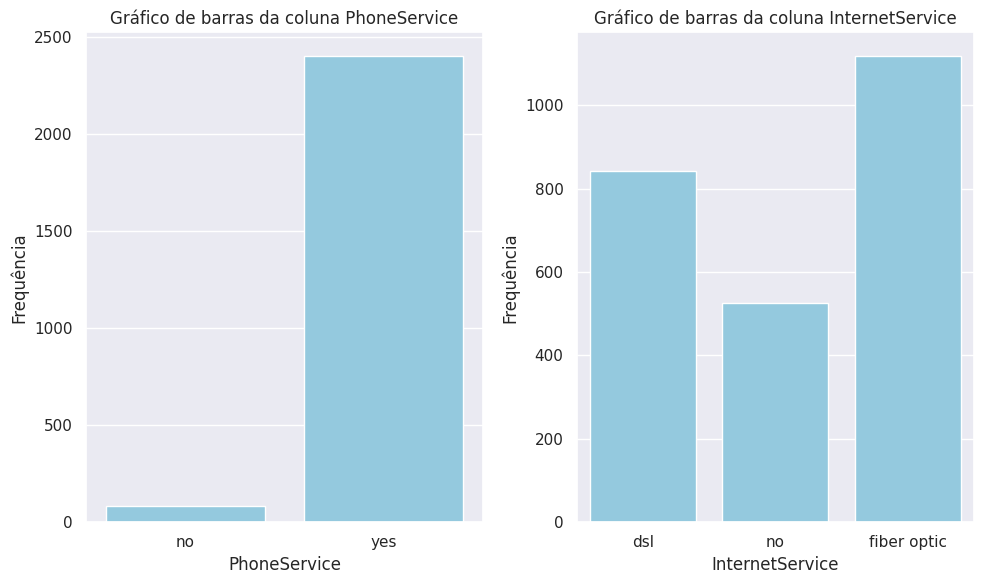

In [9]:
plt.figure(figsize=(10, 6))

# Gráfico de barras de PhoneService
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='PhoneService', color='skyblue')
plt.title('Gráfico de barras da coluna PhoneService')
plt.ylabel('Frequência')

# Gráfico de barras de InternetService
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='InternetService', color='skyblue')
plt.title('Gráfico de barras da coluna InternetService')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

In [10]:
# Porcentagem de PhoneService
df['PhoneService'].value_counts(normalize=True) * 100

,proportion
PhoneService,
yes,96.543408
no,3.456592


Observamos um desequilíbrio na coluna **PhoneService**, com aproximadamente 97% das entradas indicando "Yes". Essa variável já foi tratada na etapa anterior por ter valores nulos. Mas, pela sua baixa variabilidade, ela pode acabar contribuindo pouco para um modelo preditivo ou até introduzindo viés.

Por enquanto optamos por **não realizar modificações adicionais**, mas a exclusão dessa coluna poderá ser considerada em uma etapa futura de modelagem.


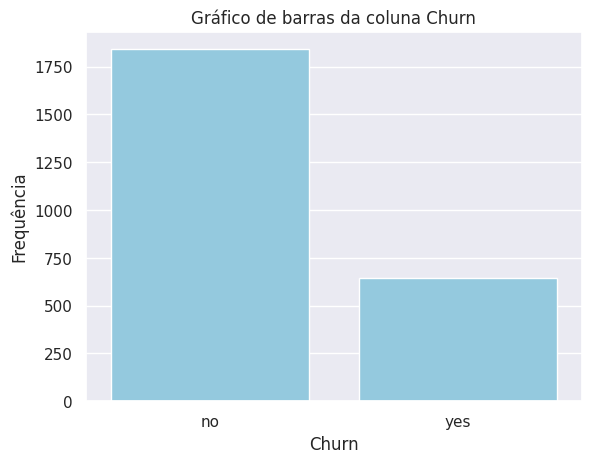

In [11]:
# Gráfico de barras de Churn
sns.countplot(data=df, x='Churn', color='skyblue')
plt.title('Gráfico de barras da coluna Churn')
plt.ylabel('Frequência')

plt.show()

In [12]:
# Porcentagem de Churn
df['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
no,73.995177
yes,26.004823


A variável Churn é a que tentaremos prever, mas temos um desbalanceamento nos dados, com 74% de casos de 'não Churn'. Isso pode resultar em um enviesamento do modelo preditivo, então vamos analisar a necessidade de balanceamento na próxima etapa.

A variável **Churn** é a nossa variável alvo e é o comportamento que desejamos prever. Porém, há um desbalanceamento nos dados: 74% dos clientes não realizaram o cancelamento, "não churn".

Esse desbalanceamento pode levar a um viés nos modelos preditivos, favorecendo a classe majoritária. Por isso, existe a necessidade de aplicar técnicas de balanceamentoem na base de treino em etapas futuras.


## Análise Bivariada

Nesta etapa, vamos responder algumas perguntas:

1. Homens são mais propensos ao churn do que mulheres?

2. Clientes sênior têm maior probabilidade de churn?

3. Cobranças mensais elevadas estão associadas a uma maior porcentagem de churn?

4. Clientes com contrato mensal estão mais propensos ao churn?

5. Clientes com menos tempo de contrato tendem a apresentar maior porcentagem de churn?

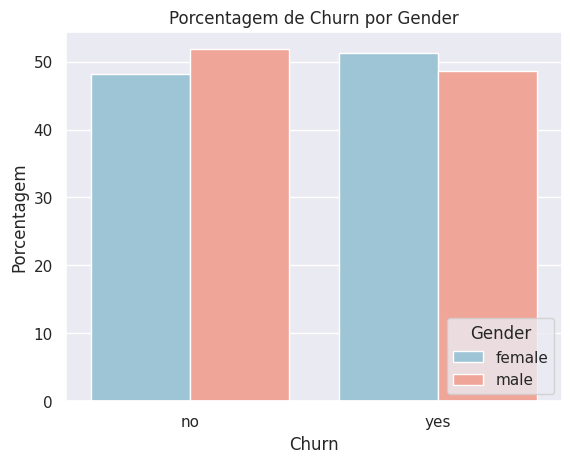

In [13]:
# Agrupa por Churn e Gender e faz a contagem e porcentagem por categoria
df_grupo = df.groupby(['Churn', 'Gender']).size().reset_index(name='Contagem')
df_grupo['TotalChurn'] = df_grupo.groupby('Churn')['Contagem'].transform('sum')
df_grupo['Porcentagem'] = (df_grupo['Contagem'] / df_grupo['TotalChurn']) * 100

# Plota porcentagem de Gender por Churn.
palette = '#93c9df', '#ff9a8a', '#aadc88'
ax = sns.barplot(data=df_grupo, x='Churn', y='Porcentagem', hue='Gender', palette=palette)
plt.title('Porcentagem de Churn por Gender')
sns.move_legend(ax, "lower right")
plt.show()

Na etapa anterior verificamos que temos dados bem distribuídos em **Gender**, e ao analisar os casos de **Churn por Gender**, percebemos que homens e mulheres possuem praticamente as mesmas taxas.

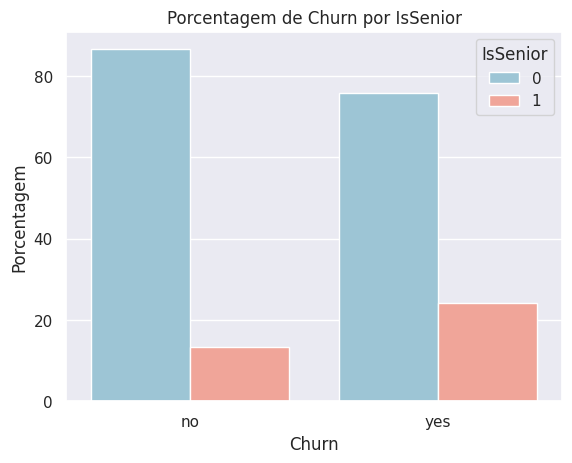

In [14]:
# Agrupa por Churn e IsSenior e faz a contagem e porcentagem por categoria
df_grupo = df.groupby(['Churn', 'IsSenior']).size().reset_index(name='Contagem')
df_grupo['TotalChurn'] = df_grupo.groupby('Churn')['Contagem'].transform('sum')
df_grupo['Porcentagem'] = (df_grupo['Contagem'] / df_grupo['TotalChurn']) * 100

# Plota porcentagem de IsSenior por Churn.
sns.barplot(data=df_grupo, x='Churn', y='Porcentagem', hue='IsSenior', palette=palette)
plt.title('Porcentagem de Churn por IsSenior')
plt.show()

A maioria dos clientes tem menos de 60 anos, e, como mostrado no gráfico, apresentam a maior porcentagem de churn positivo. No entanto, proporcionalmente, **clientes acima de 60 anos estão mais propensos ao churn**, já que representam 24% dos que deram churn, enquanto correspondem a apenas 13% dos que não deram churn.

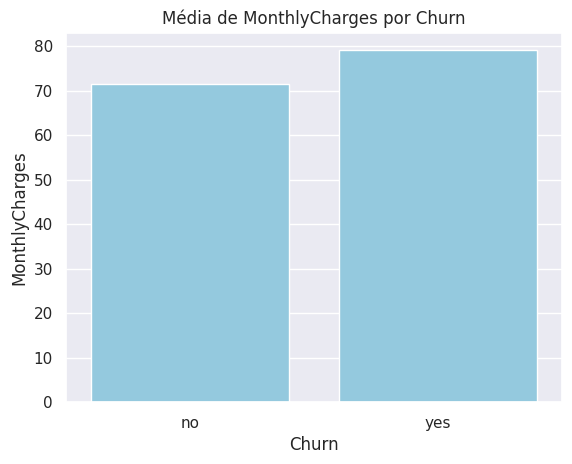

In [15]:
# Calcula a mediana de MonthlyCharges por Churn
mediana = df.groupby('Churn')['MonthlyCharges'].median().reset_index()

# Plota mediana de MonthlyCharges por Churn.
sns.barplot(data=mediana, x='Churn', y='MonthlyCharges', color='skyblue')
plt.title('Média de MonthlyCharges por Churn')
plt.show()

Ao observar a coluna **MonthlyCharges**, temos uma leve tendência ao churn positivo para valores mais altos. Mas, a diferença é pequena.

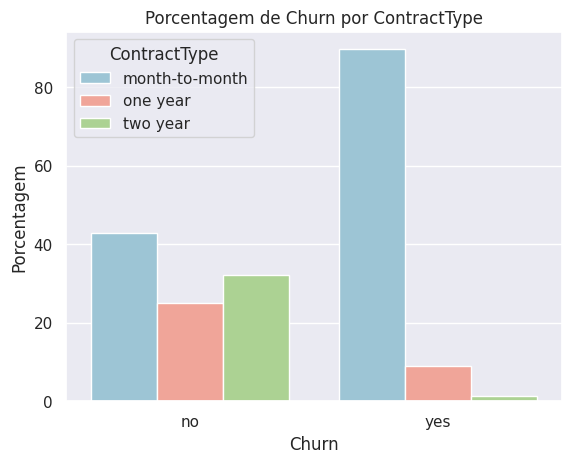

In [16]:
# Agrupa por Churn e ContractType e faz a contagem e porcentagem por categoria
df_grupo = df.groupby(['Churn', 'ContractType']).size().reset_index(name='Contagem')
df_grupo['TotalChurn'] = df_grupo.groupby('Churn')['Contagem'].transform('sum')
df_grupo['Porcentagem'] = (df_grupo['Contagem'] / df_grupo['TotalChurn']) * 100

# Plota porcentagem de ContractType por Churn.
sns.barplot(data=df_grupo, x='Churn', y='Porcentagem', hue='ContractType', palette=palette)
plt.title('Porcentagem de Churn por ContractType')
plt.show()

A análise da coluna **ContractType** em relação ao **Churn** nos mostra que **clientes com contrato mensal tem elevada tendência ao churn positivo** (89.6%).



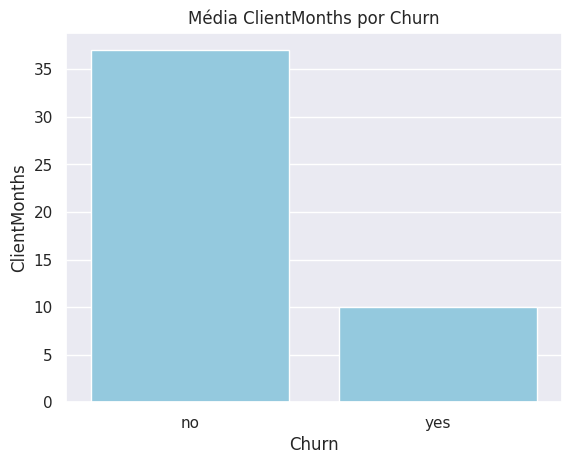

In [17]:
# Calcula a mediana de ClientMonths por Churn
mediana = df.groupby('Churn')['ClientMonths'].median().reset_index()

# Plota mediana de ClientMonths por Churn.
sns.barplot(data=mediana, x='Churn', y='ClientMonths', color='skyblue')
plt.title('Média ClientMonths por Churn')
plt.show()

Para a coluna **ClientMonths**, é possível observar que **clientes que estão há menos tempo contratando os serviços da empresa estão mais propensos ao churn**.

## Conclusões

- A grande maioria dos clientes contratam o serviço de telefonia.
- Há uma quantidade equilibrada de clientes femininos e masculinos, e o gênero não apresenta influência no churn.
- O valor mensal cobrado pelos serviços também não tem impacto direto no churn.
- A maioria dos clientes tem menos de 60 anos, mas os clientes acima dessa faixa etária mostram maior tendência ao churn.
- Clientes com menor tempo de contrato apresentam maior porcentagem de churn.
- Clientes com contrato mensal têm maior tendência ao churn.

 Essas observações servirão como base para a modelagem preditiva de churn. Além disso, os insights são valiosos para a empresa e podem ser compartilhados com a equipe de marketing para desenvolver ações direcionadas aos clientes mais propensos ao churn.